
See readme for information about this file.

Ethoflow: computer vision and artificial intelligence-based software for automatic behavior analysis
v 1.0

DOI: [10.1101/2020.07.23.218255](https://www.biorxiv.org/content/10.1101/2020.07.23.218255v1)
LicenseCC BY-NC-ND 4.0

@developer: [Rodrigo Cupertino Bernardes](https://www.researchgate.net/profile/Rodrigo_Cupertino_Bernardes)


<marquee style='width: 30%; color: blue;'><b>
<img src="icon/logo_ethoflow.png" alt="Ethoflow" width="200"
         height="80"></b></marquee>


## Train model to recognize complex behavior

In [1]:
from ethoflow_complex_behavior import getdata
from ethoflow_complex_behavior import run_network
from ethoflow_complex_behavior import plot_history
from ethoflow_complex_behavior import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np
from os import listdir

C:\Users\rodri\ethoflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rodri\ethoflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rodri\ethoflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rodri\ethoflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
beh = ["behavior/"+f for f in listdir("data/behavior/") ]
non_beh = ["non_behavior/"+f for f in listdir("data/non_behavior/") ]

(testX, trainX, testY, trainY)= getdata(classes=2,pathbehavior=beh,pathnonbehavior=non_beh) # run in local machine

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 122, 122, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 59, 59, 32)        128       
__________________________________________

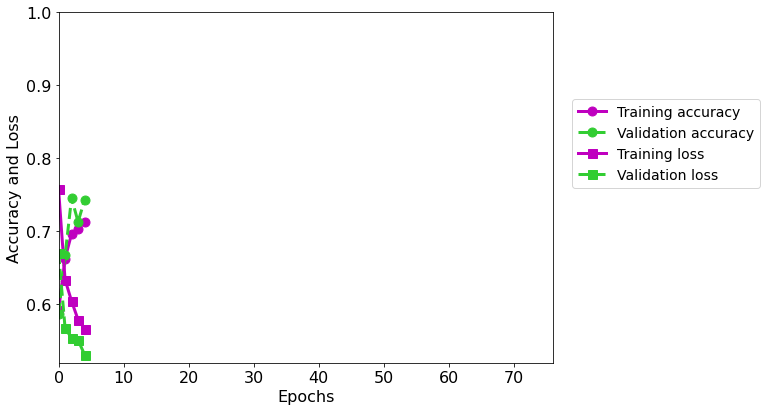

In [3]:
run_network("models/file_model.h5", 'models/file_model_history.pckl',testX, trainX, testY, trainY )

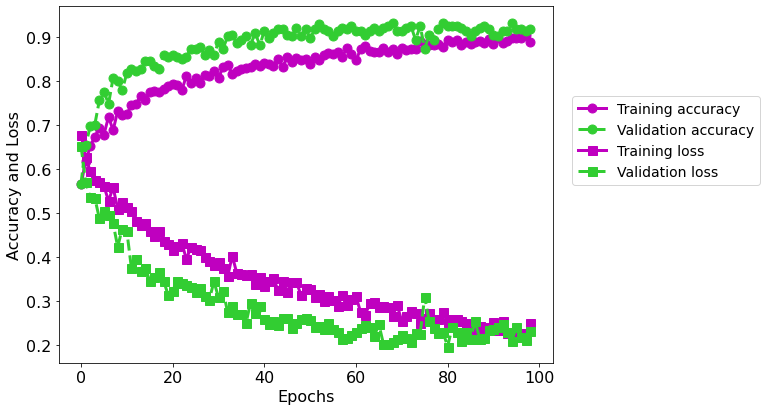

In [2]:
plot_history('models/model_history_3.pckl')

# Inspect trained model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Normalized confusion matrix
[[0.98 0.02]
 [0.07 0.93]]


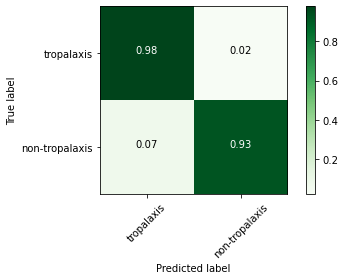

In [4]:
from ethoflow_complex_behavior import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
teste = load_model('models/model_3.h5') #load model

pred = teste.predict(testX)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(testY,axis = 1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2,pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['tropalaxis', 'non-tropalaxis'], normalize=True,
                      title='',cmap=plt.cm.Greens)

#plt.savefig('figures/train_3_matrix_norm.pdf',dpi=300 )
plt.show()

# Metrics

In [16]:
from ethoflow_complex_behavior import metrics
MC=cnf_matrix
metrics(MC)

producer accuracy [0.91 0.96]
Global accuracy = 94.22572178477691
Kappa index  =  0.8806288985730155
Z-test =  35.67382471440907 

Rejects H0, the classification is different from random.
